# Тестовое задание для Data Heroes
## Обработка данных
Импорты библиотек и чтение данных из документа:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('testdata.xlsx', sheet_name='data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_id       320 non-null    int64         
 1   event_date     320 non-null    datetime64[ns]
 2   customer_id    320 non-null    int64         
 3   is_attend      320 non-null    int64         
 4   group_ids      320 non-null    int64         
 5   teacher_ids    320 non-null    int64         
 6   attendance_id  320 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 17.6 KB


In [4]:
df.head()

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,5,2020-05-22,47,1,2,6,12
1,15,2020-06-03,354,1,5,4,57
2,34,2020-06-17,183,1,5,4,158
3,22,2020-06-11,12,1,1,3,95
4,36,2020-06-19,260,1,5,4,185


Поле `is_attend` показывает, был ли клиент (`customer_id`, уникальный для каждого клиента) на некоем мероприятии (`event_id`). 1 - посетил, 0 - отсутствовал. Проверяем, что это поле содержит только нужные значения:

In [5]:
df['is_attend'].unique()

array([1, 0], dtype=int64)

Мы можем отфильтровать набор данных по этому полю, оставив только строки с посещениями:

In [6]:
filtered = df[df['is_attend'] == 1]
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 318
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_id       264 non-null    int64         
 1   event_date     264 non-null    datetime64[ns]
 2   customer_id    264 non-null    int64         
 3   is_attend      264 non-null    int64         
 4   group_ids      264 non-null    int64         
 5   teacher_ids    264 non-null    int64         
 6   attendance_id  264 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 16.5 KB


Создаём сводную таблицу с количеством посещений по датам, которая потом послужит основой для графика:

In [7]:
attendants = filtered.pivot_table(index='event_date', values='customer_id', aggfunc='count')

In [8]:
attendants.head()

,customer_id
event_date,
2020-05-21,8
2020-05-22,4
2020-05-23,4
2020-05-25,3
2020-05-26,4


## Визуализация
Строим график:

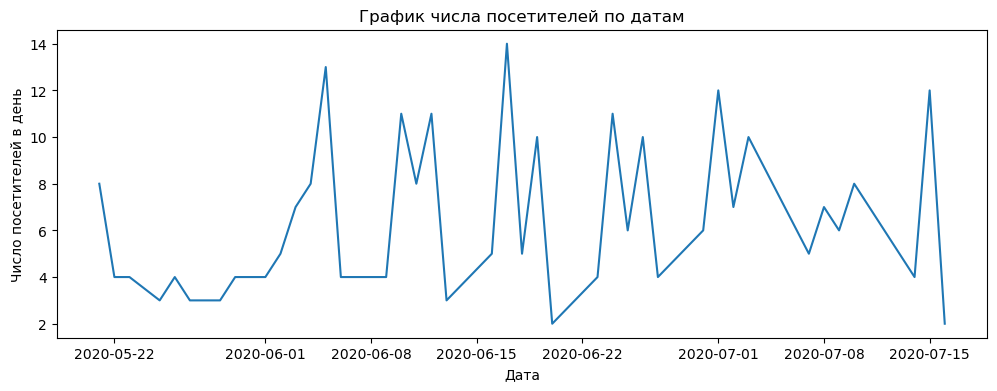

In [9]:
plt.figure(figsize=(12,4))
plt.title('График числа посетителей по датам')
plt.xlabel('Дата')
plt.ylabel('Число посетителей в день')
plt.plot(attendants)
plt.show()

Также мы можем построить и другие графики, например, количество клиентов по группам:

In [10]:
filtered['group_ids'].unique()

array([2, 5, 1, 3], dtype=int64)

In [11]:
groupmembers = filtered.pivot_table(index='group_ids', values='customer_id', aggfunc='count')

Поскольку групп у нас немного, график лучше показать не линией, а точками:

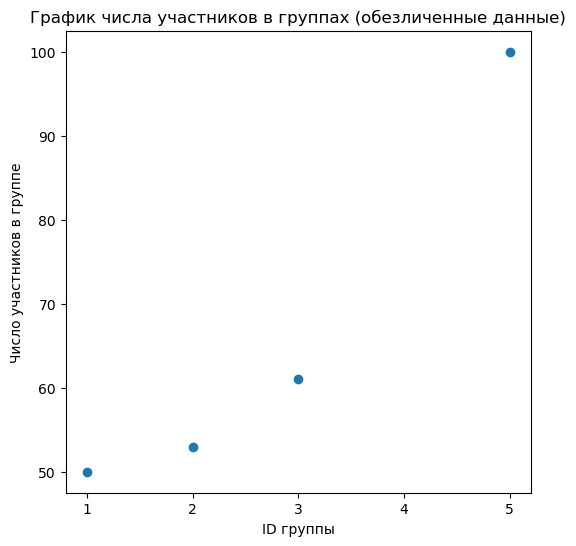

In [12]:
plt.figure(figsize=(6,6))
plt.title('График числа участников в группах (обезличенные данные)')
plt.xlabel('ID группы')
plt.ylabel('Число участников в группе')
plt.xticks(range(1, 6))
plt.plot(groupmembers, 'o')
plt.show()

Аналогично можно найти и количество учеников у каждого из преподавателей (`teacher_ids`):

In [13]:
teacherpupils = filtered.pivot_table(index='teacher_ids', values='customer_id', aggfunc='count')

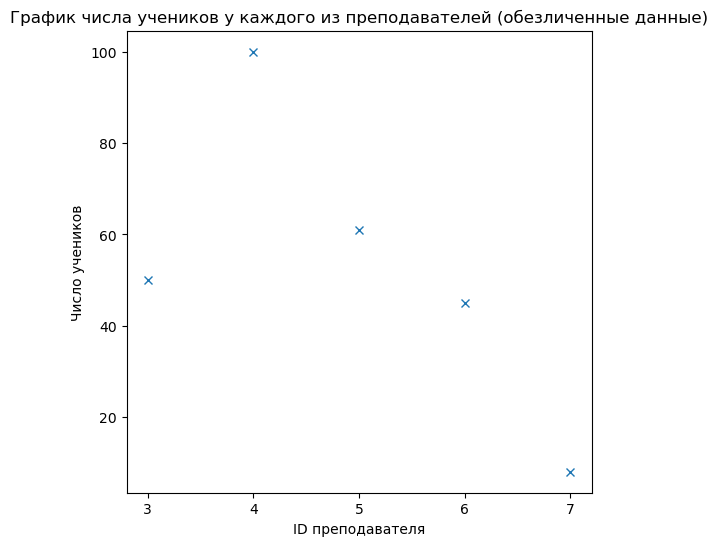

In [15]:
plt.figure(figsize=(6,6))
plt.title('График числа учеников у каждого из преподавателей (обезличенные данные)')
plt.xlabel('ID преподавателя')
plt.ylabel('Число учеников')
plt.xticks(range(1, 8))
plt.plot(teacherpupils, 'x')
plt.show()